In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
import os

In [3]:
batch_size = 64

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("../input/animefacedataset/images", label_mode=None,\
                                                              image_size=(64, 64), batch_size=batch_size, shuffle= True)

Found 63565 files belonging to 1 classes.


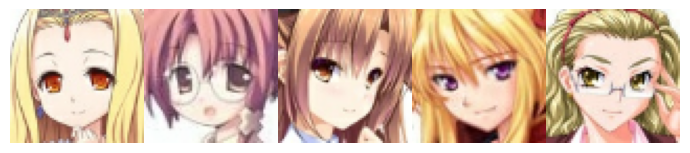

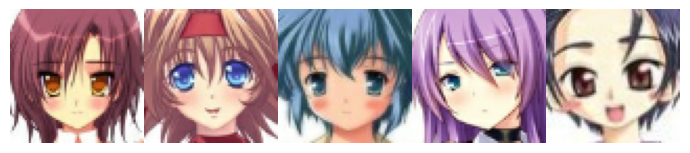

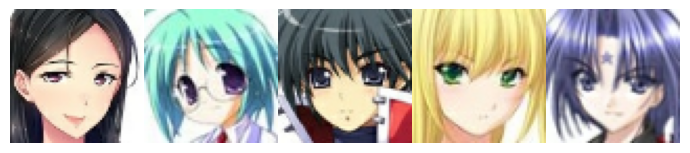

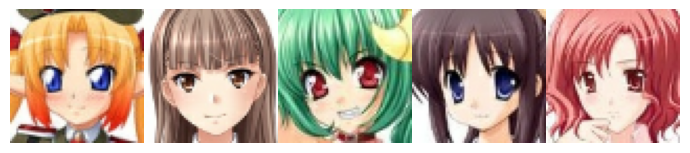

In [5]:
def plots(imgs):
    fig, axs = plt.subplots(1, 5, figsize= (7,7))
    for ax, img in zip(axs, imgs):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
        
for idx, x in enumerate(dataset):
#     plots(x.numpy().astype("int32")[:5])
    plots(x.numpy().astype(np.uint8)[:5])
    if idx == 3:
        break

In [6]:
# dataset= dataset.map(lambda x: x/255.0)
dataset= dataset.map(lambda x: (x/127.5)-1.0)

In [7]:
from src.generator import Generator, latent_dim
from src.discriminator import Discriminator
from src.gan import GAN
from src.monitor import plots

n_gpus = len(tf.config.list_physical_devices('GPU'))
gpus = [f'GPU:{i}' for i in range(n_gpus)]

In [12]:
strategy = tf.distribute.MirroredStrategy(gpus)

epochs = 50

def set_lr(lr, decay_steps= 1e6, decay_rate= 0.97):
    learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(\
                               lr, decay_steps= 1e6, decay_rate= 0.97)
    return learning_rate_schedule

def wasserstein_loss(y_true, y_pred):
    return tf.reduce_mean(y_true * y_pred)
#     return tf.keras.backend.mean(y_true * y_pred)

/opt/conda/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/50
994/994 [==============================] - ETA: 0s - d_loss: 0.6568 - g_loss: 1.0096

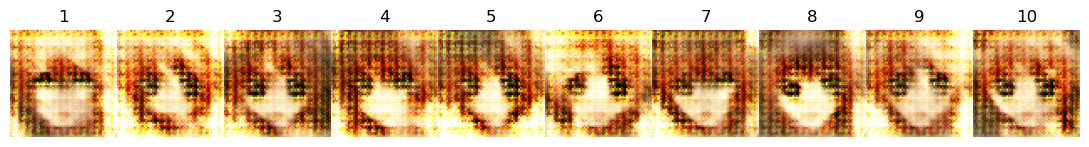

994/994 [==============================] - 135s 121ms/step - d_loss: 0.6568 - g_loss: 1.0096
Epoch 2/50
994/994 [==============================] - 80s 80ms/step - d_loss: 0.6626 - g_loss: 1.0524
Epoch 3/50
994/994 [==============================] - 80s 80ms/step - d_loss: 0.6758 - g_loss: 0.8746
Epoch 4/50
994/994 [==============================] - 79s 80ms/step - d_loss: 0.6722 - g_loss: 0.8787
Epoch 5/50
993/994 [============================>.] - ETA: 0s - d_loss: 0.6821 - g_loss: 0.8241

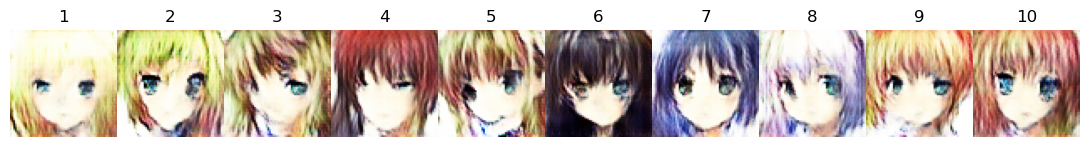

994/994 [==============================] - 80s 80ms/step - d_loss: 0.6821 - g_loss: 0.8241
Epoch 6/50
994/994 [==============================] - 80s 80ms/step - d_loss: 0.6831 - g_loss: 0.8211
Epoch 7/50
994/994 [==============================] - 80s 80ms/step - d_loss: 0.6843 - g_loss: 0.8144
Epoch 8/50
994/994 [==============================] - 79s 80ms/step - d_loss: 0.6821 - g_loss: 0.8204
Epoch 9/50
994/994 [==============================] - 80s 80ms/step - d_loss: 0.6795 - g_loss: 0.8310
Epoch 10/50
993/994 [============================>.] - ETA: 0s - d_loss: 0.6757 - g_loss: 0.8453

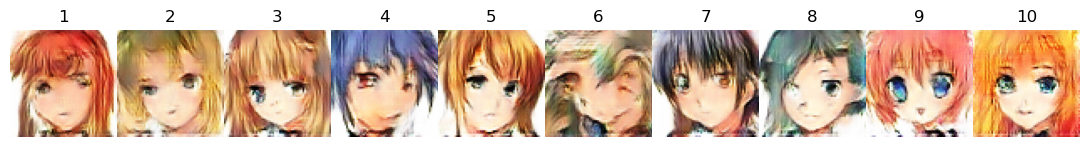

994/994 [==============================] - 80s 80ms/step - d_loss: 0.6757 - g_loss: 0.8453
Epoch 11/50
994/994 [==============================] - 79s 80ms/step - d_loss: 0.6695 - g_loss: 0.8698
Epoch 12/50
994/994 [==============================] - 80s 80ms/step - d_loss: 0.6590 - g_loss: 0.9134
Epoch 13/50
994/994 [==============================] - 80s 80ms/step - d_loss: 0.6462 - g_loss: 0.9623
Epoch 14/50
994/994 [==============================] - 80s 80ms/step - d_loss: 0.6152 - g_loss: 1.0682
Epoch 15/50
993/994 [============================>.] - ETA: 0s - d_loss: 0.5920 - g_loss: 1.1420

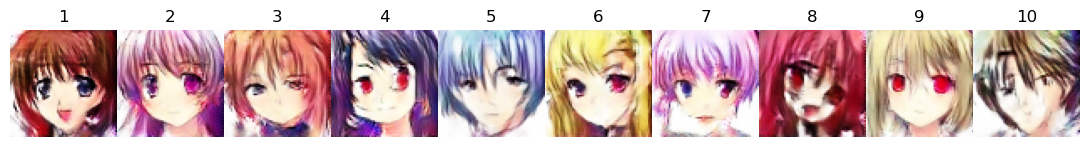

994/994 [==============================] - 81s 81ms/step - d_loss: 0.5919 - g_loss: 1.1420
Epoch 16/50
994/994 [==============================] - 80s 81ms/step - d_loss: 0.5614 - g_loss: 1.2243
Epoch 17/50
994/994 [==============================] - 80s 80ms/step - d_loss: 0.5394 - g_loss: 1.2930
Epoch 18/50
994/994 [==============================] - 80s 80ms/step - d_loss: 0.5152 - g_loss: 1.3840
Epoch 19/50
994/994 [==============================] - 80s 80ms/step - d_loss: 0.4984 - g_loss: 1.4466
Epoch 20/50
993/994 [============================>.] - ETA: 0s - d_loss: 0.4859 - g_loss: 1.4970

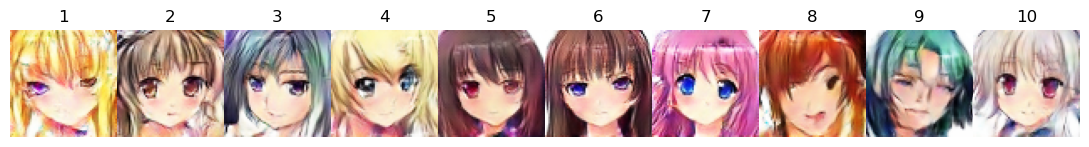

994/994 [==============================] - 80s 80ms/step - d_loss: 0.4859 - g_loss: 1.4969
Epoch 21/50
994/994 [==============================] - 79s 80ms/step - d_loss: 0.4668 - g_loss: 1.5690
Epoch 22/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.4575 - g_loss: 1.6261
Epoch 23/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.4330 - g_loss: 1.7270
Epoch 24/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.4204 - g_loss: 1.7992
Epoch 25/50
993/994 [============================>.] - ETA: 0s - d_loss: 0.4098 - g_loss: 1.8656

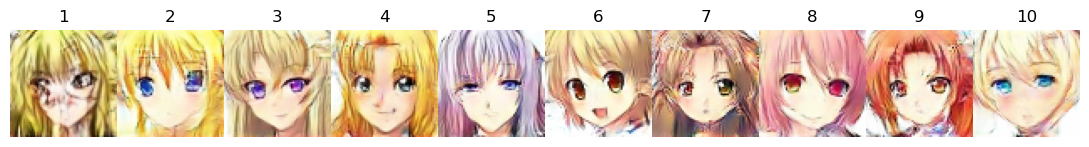

994/994 [==============================] - 80s 80ms/step - d_loss: 0.4097 - g_loss: 1.8657
Epoch 26/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.3990 - g_loss: 1.9319
Epoch 27/50
994/994 [==============================] - 79s 80ms/step - d_loss: 0.3829 - g_loss: 2.0192
Epoch 28/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.3793 - g_loss: 2.0719
Epoch 29/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.3666 - g_loss: 2.1402
Epoch 30/50
993/994 [============================>.] - ETA: 0s - d_loss: 0.3592 - g_loss: 2.1997

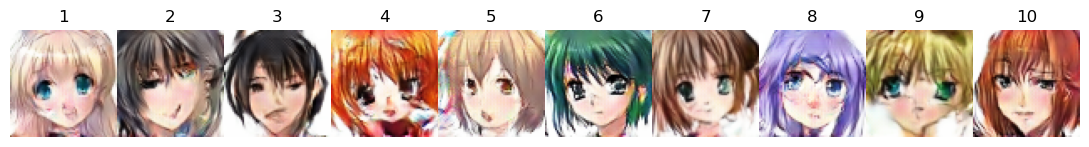

994/994 [==============================] - 81s 81ms/step - d_loss: 0.3592 - g_loss: 2.1996
Epoch 31/50
994/994 [==============================] - 79s 80ms/step - d_loss: 0.3412 - g_loss: 2.3164
Epoch 32/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.3330 - g_loss: 2.4025
Epoch 33/50
994/994 [==============================] - 80s 80ms/step - d_loss: 0.3203 - g_loss: 2.4818
Epoch 34/50
994/994 [==============================] - 80s 80ms/step - d_loss: 0.3114 - g_loss: 2.5747
Epoch 35/50
993/994 [============================>.] - ETA: 0s - d_loss: 0.2969 - g_loss: 2.6953

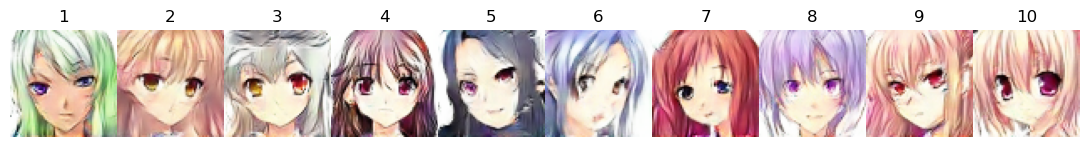

994/994 [==============================] - 80s 80ms/step - d_loss: 0.2969 - g_loss: 2.6953
Epoch 36/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.2995 - g_loss: 2.7491
Epoch 37/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.2834 - g_loss: 2.8396
Epoch 38/50
994/994 [==============================] - 79s 80ms/step - d_loss: 0.2750 - g_loss: 2.9491
Epoch 39/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.2646 - g_loss: 3.0668
Epoch 40/50
993/994 [============================>.] - ETA: 0s - d_loss: 0.2527 - g_loss: 3.1952

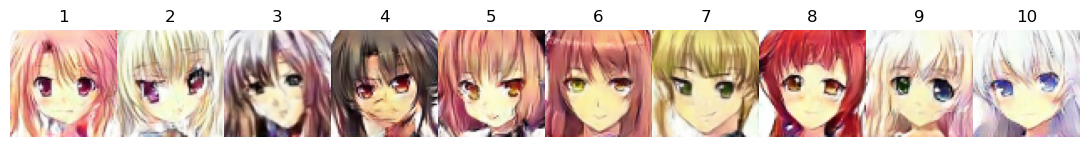

994/994 [==============================] - 80s 80ms/step - d_loss: 0.2528 - g_loss: 3.1949
Epoch 41/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.2478 - g_loss: 3.2912
Epoch 42/50
994/994 [==============================] - 79s 80ms/step - d_loss: 0.2427 - g_loss: 3.3723
Epoch 43/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.2368 - g_loss: 3.4946
Epoch 44/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.2312 - g_loss: 3.5807
Epoch 45/50
993/994 [============================>.] - ETA: 0s - d_loss: 0.2147 - g_loss: 3.7602

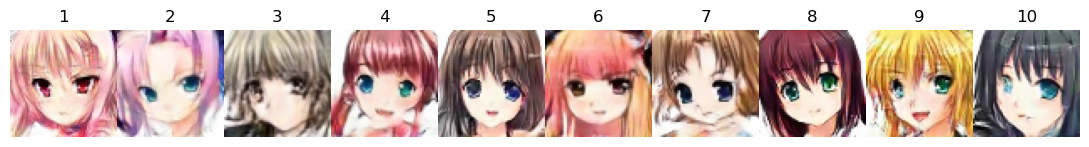

994/994 [==============================] - 80s 80ms/step - d_loss: 0.2147 - g_loss: 3.7603
Epoch 46/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.2159 - g_loss: 3.8363
Epoch 47/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.2060 - g_loss: 3.9760
Epoch 48/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.2041 - g_loss: 4.0685
Epoch 49/50
994/994 [==============================] - 79s 79ms/step - d_loss: 0.1998 - g_loss: 4.1565
Epoch 50/50
993/994 [============================>.] - ETA: 0s - d_loss: 0.1915 - g_loss: 4.2929

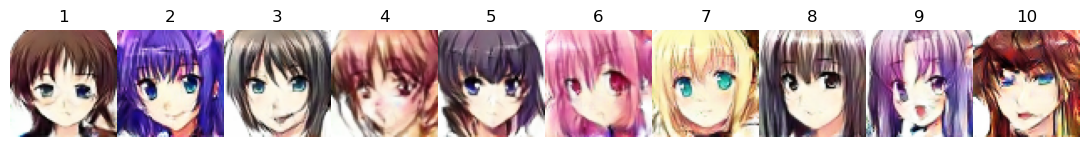

994/994 [==============================] - 80s 80ms/step - d_loss: 0.1915 - g_loss: 4.2928


In [13]:
with strategy.scope():
    animeGAN = GAN(discriminator=Discriminator(), generator=Generator(),\
                   latent_dim=latent_dim)
#     animeGAN.build((None, latent_dim))
    animeGAN.compile(
        d_optimizer=tf.keras.optimizers.Adam(set_lr(1e-4, decay_rate= 0.90), beta_1=0.5),
        g_optimizer=tf.keras.optimizers.Adam(set_lr(3.5e-4), beta_1=0.5),\
        loss_fn=tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE))
#                      loss_fn=wasserstein_loss)
#     animeGAN.load_weights('./anime.hdf5')
    history = animeGAN.fit(dataset, epochs= epochs, callbacks= [plots], verbose=1)

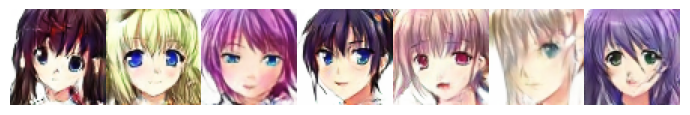

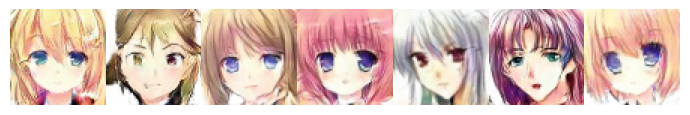

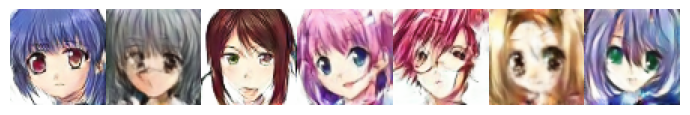

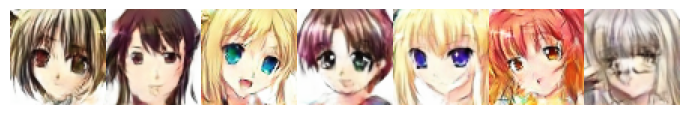

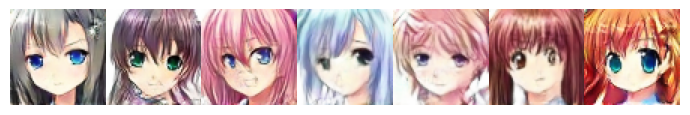

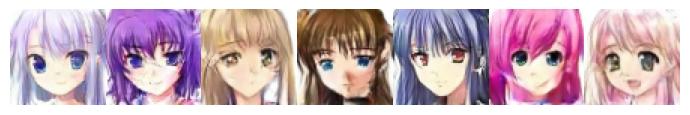

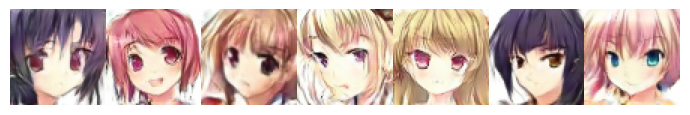

In [16]:
num_imgs = 7

def plots(imgs):
    fig, axs = plt.subplots(1, num_imgs, figsize= (7,7))
    for ax, img in zip(axs, imgs):
        ax.imshow(img, cmap = 'gray')
        ax.axis('off')
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

for i in range(7):
    imgs = animeGAN.generator.predict(tf.random.normal((num_imgs, latent_dim)), verbose = 0)
    imgs = (imgs+1)*127.5
    imgs = imgs.astype(np.uint8)
    plots(imgs)
    